<a href="https://colab.research.google.com/github/VivianeCorreia/Tech-Challenge/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

df_prod= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/Producao.csv", delimiter=";")
df_proc_viniferas=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaViniferas.csv", delimiter="\t")
df_proc_americanas=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaAmericanas.csv", delimiter=";")
df_proc_mesa=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaMesa.csv", delimiter=";")
df_proc_semclass=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaSemclass.csv", delimiter=";")
df_comercio= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/Comercio.csv", delimiter=";")

df_imp_vinho= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpVinhos.csv", delimiter=";")
df_imp_espumante= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpEspumantes.csv", delimiter=";")
df_imp_frescas= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpFrescas.csv", delimiter=";")
df_imp_passas= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpPassas.csv", delimiter=";")
df_imp_suco= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpSuco.csv", delimiter=";")

df_exp_vinho=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpVinho.csv", delimiter=";")
df_exp_espumante=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpEspumantes.csv", delimiter=";")
df_exp_uva=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpUva.csv", delimiter=";")
df_exp_suco=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpSuco.csv", delimiter=";")

In [228]:
df_prod_tratado = df_prod.drop(columns=["id"], axis=0)
df_prod_tratado = df_prod_tratado[:8]
df_prod_tratado.head()

,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [229]:
df_prod_tratado_T = df_prod_tratado.T
df_prod_tratado_T.columns=[ "Vinho de mesa", "Vinho de mesa", "Vinho de mesa", "Vinho de mesa", "Vinho fino", "Vinho fino de mesa", "Vinho fino de mesa", "Vinho fino de mesa" ]
df_prod_tratado_T = df_prod_tratado_T.drop(columns=["Vinho de mesa", "Vinho fino"], axis=0)
df_prod_tratado_T.head()



,Vinho fino de mesa,Vinho fino de mesa,Vinho fino de mesa
produto,Tinto,Branco,Rosado
1970,7591557,15562889,744900
1971,7265666,15655709,664687
1972,6782837,13289304,1006630
1973,3419625,7930070,1018715


In [230]:
df_prod_R = df_prod_tratado_T.T
df_prod_R


,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Vinho fino de mesa,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
Vinho fino de mesa,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
Vinho fino de mesa,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265


In [231]:
df_prod_R = pd.melt(df_prod_R, id_vars=['produto'], var_name='Ano', value_name='Qtd', ignore_index=False)
df_prod_R.rename(columns={'produto': 'Tipo'}, inplace=True)
df_prod_R.head()

,Tipo,Ano,Qtd
Vinho fino de mesa,Tinto,1970,7591557
Vinho fino de mesa,Branco,1970,15562889
Vinho fino de mesa,Rosado,1970,744900
Vinho fino de mesa,Tinto,1971,7265666
Vinho fino de mesa,Branco,1971,15655709


In [232]:
df_prod_R.index.name = "Produto"
df_prod_R.head()

,Tipo,Ano,Qtd
Produto,,,
Vinho fino de mesa,Tinto,1970,7591557
Vinho fino de mesa,Branco,1970,15562889
Vinho fino de mesa,Rosado,1970,744900
Vinho fino de mesa,Tinto,1971,7265666
Vinho fino de mesa,Branco,1971,15655709


In [233]:
df_prod_R["Ano"]=df_prod_R["Ano"].astype("int64")
df_prod_R["Qtd"]=df_prod_R["Qtd"].astype("int64")

df_filtrado  = df_prod_R.loc[df_prod_R['Ano'] >= df_prod_R["Ano"].max()-15]
df_filtrado.head()

,Tipo,Ano,Qtd
Produto,,,
Vinho fino de mesa,Tinto,2007,24786071
Vinho fino de mesa,Branco,2007,17598428
Vinho fino de mesa,Rosado,2007,791985
Vinho fino de mesa,Tinto,2008,27583032
Vinho fino de mesa,Branco,2008,18812571


<Axes: title={'center': 'Qtd produzida por período'}, xlabel='Ano'>

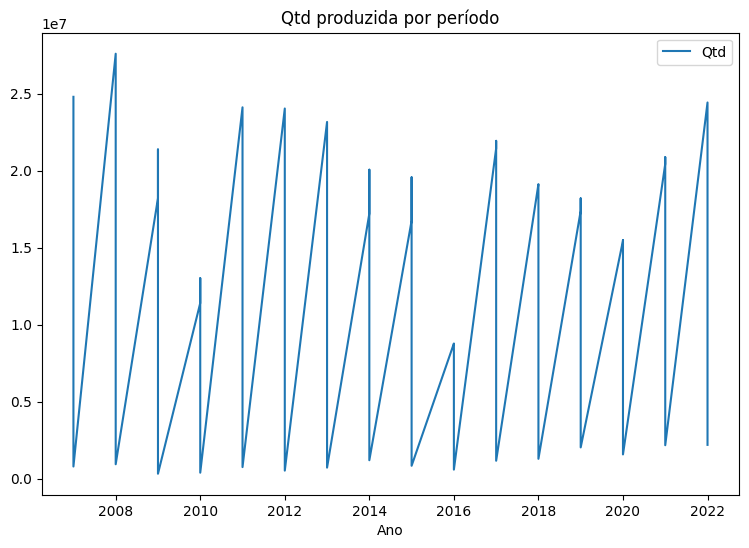

In [234]:
df_filtrado.plot(x="Ano",y="Qtd", figsize=(9,6), title = "Qtd produzida por período")


In [235]:
df_exp_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df_exp_vinho= df_exp_vinho.drop(columns=["Id"], axis=0)



In [237]:
df_exp_vinho= df_exp_vinho.set_index("País")


In [238]:
df_exp_vinho.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,0,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
df_exp_vinho.T

País,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,...,"Tcheca, República",Togo,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970.1,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,0,0,3200,0
1971.1,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,0,0,2000,0
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,0,0,1350,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020.1,0,21,32605,0,0,1864,0,4176,0,3413,...,4805,0,0,0,0,4,0,31,9808,584
2021,11,0,2698,0,0,805,0,6,0,705,...,456,1890,0,0,343,0,136774,0,26415,0
2021.1,46,0,6741,0,0,2268,0,13,0,4034,...,5988,2012,0,0,878,0,149842,0,35944,0
2022,0,0,7630,4068,0,419,0,480,0,1424,...,1305,17317,0,0,418,0,637117,0,23220,130


In [240]:
df_exp_vinho = pd.melt(df_prod_R, id_vars=['Ano'], var_name='Ano', value_name='Valor', ignore_index=False)
#df_prod_R.rename(columns={'produto': 'Tipo'}, inplace=True)